In [ ]:
import tensorflow as tf

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(28,28,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(47))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 96)          11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 7, 7, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [ ]:
# Compiling the model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [ ]:
id_train = '16eqqRB8yIhsiESl91kWHFlkrWQ9Jzobo'
id_test = '1qf_U_71d9-qicwZC4baRqFFwnIbm1eIh'

In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':id_train}) 
downloaded.GetContentFile('emnist-balanced-train.csv')  
training_df = pd.read_csv('emnist-balanced-train.csv')
downloaded = drive.CreateFile({'id':id_test}) 
downloaded.GetContentFile('emnist-balanced-test.csv')  
testing_df = pd.read_csv('emnist-balanced-test.csv')

In [ ]:
testing_df = pd.read_csv('emnist-balanced-test.csv', header = None)
training_df = pd.read_csv('emnist-balanced-train.csv', header = None)

In [ ]:
training_X = (training_df.loc[:, training_df.columns != 0]).to_numpy()
training_y = (training_df.iloc[:,0]).to_numpy()
testing_X = (testing_df.loc[:, testing_df.columns != 0]).to_numpy()
testing_y = (testing_df.iloc[:,0]).to_numpy()

In [ ]:
# normalize  by 255
training_X = training_X.astype('float32')/255
testing_X = testing_X.astype('float32')/255

In [ ]:
training_X = np.array([a.reshape(28,28) for a in training_X])
testing_X = np.array([a.reshape(28,28) for a in testing_X])

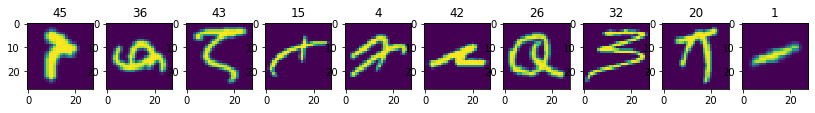

In [ ]:
import matplotlib.pyplot as plt
a = 2
b = 10
c = 1
plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 10})

for i in range(0,10):
    plt.subplot(a, b, c)
    graph = training_X[i]
    plt.title(f"{training_y[i]}")
    plt.imshow(graph, interpolation='nearest')
    c+=1


In [ ]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y=train_test_split(training_X,training_y,test_size=.3)

In [ ]:
#Verifying the dimension 
print((train_X.shape,train_y.shape))
print((val_X.shape,val_y.shape))
print((testing_X.shape,testing_y.shape))

((78960, 28, 28), (78960,))
((33840, 28, 28), (33840,))
((18800, 28, 28), (18800,))


In [ ]:
# reshape X to add another dimension
train_X = np.expand_dims(train_X, axis=3)
val_X = np.expand_dims(val_X, axis=3)
testing_X = np.expand_dims(testing_X, axis=3)

#Verifying the dimension after one hot encoding
print((train_X.shape,train_y.shape))
print((val_X.shape,val_y.shape))
print((testing_X.shape,testing_y.shape))

((78960, 28, 28, 1), (78960,))
((33840, 28, 28, 1), (33840,))
((18800, 28, 28, 1), (18800,))


In [ ]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical
#Since we have 47 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
train_y=to_categorical(train_y, num_classes = 47)
val_y=to_categorical(val_y, num_classes = 47)
testing_y=to_categorical(testing_y, num_classes = 47)

In [ ]:
#Verifying the dimension after one hot encoding
print((train_X.shape,train_y.shape))
print((val_X.shape,val_y.shape))
print((testing_X.shape,testing_y.shape))

((78960, 28, 28, 1), (78960, 47))
((33840, 28, 28, 1), (33840, 47))
((18800, 28, 28, 1), (18800, 47))


In [ ]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(train_X)
val_generator.fit(val_X)
test_generator.fit(testing_X)

In [ ]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_accuracy', actor=.01, patience=3, min_lr=1e-5) 

In [ ]:
#Defining the parameters
batch_size= 320
epochs=15
learn_rate=.001

In [ ]:
#Training the model
AlexNet.fit_generator(train_generator.flow(train_X, train_y, batch_size=batch_size), epochs = epochs,  steps_per_epoch = train_X.shape[0]//batch_size,
                      validation_data = val_generator.flow(val_X, val_y, batch_size=batch_size), validation_steps =  val_X.shape[0]//batch_size, callbacks = [lrr], verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
246/246 [==============================] - 1014s 4s/step - loss: 1.3623 - accuracy: 0.6352 - val_loss: 3.6995 - val_accuracy: 0.1071
Epoch 2/15
246/246 [==============================] - 1015s 4s/step - loss: 0.8040 - accuracy: 0.7663 - val_loss: 3.5736 - val_accuracy: 0.0957
Epoch 3/15
246/246 [==============================] - 1041s 4s/step - loss: 0.6956 - accuracy: 0.7892 - val_loss: 2.9945 - val_accuracy: 0.2636
Epoch 4/15
246/246 [==============================] - 1038s 4s/step - loss: 0.6306 - accuracy: 0.8025 - val_loss: 2.9537 - val_accuracy: 0.2437
Epoch 5/15
246/246 [==============================] - 1017s 4s/step - loss: 0.5897 - accuracy: 0.8117 - val_loss: 2.1124 - val_accuracy: 0.5155
Epoch 6/15
246/246 [==============================] - 1026s 4s/step - loss: 0.5544 - accuracy: 0.8195 - val_loss: 2.7106 - val_accuracy: 0.2865
Epoch 7/15
246/246 [==============================] - 979s 4s/step - loss: 0.5325 - accuracy: 0.8250 - val_loss: 2.2044 - val_accuracy: 

KeyboardInterrupt: ignored

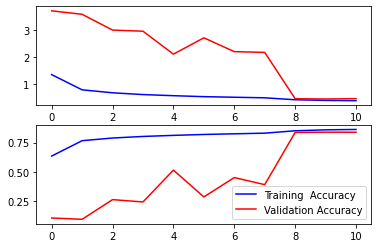

In [ ]:
import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(AlexNet.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(AlexNet.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(AlexNet.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(AlexNet.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
y_pred=AlexNet.predict_classes(testing_X)
y_true=np.argmax(testing_y,axis=1)

from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy Score =  0.8363297872340425


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

In [ ]:
!mkdir -p saved_model
AlexNet.save('saved_model/updated_alexnet') 

In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

In [ ]:
!ls saved_model
